In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import logistic

from scipy.stats import logistic, norm
from scipy.stats import multivariate_normal as Gaussian

import time

In [2]:
'''
This file contains sample code about how to use Gauss–Hermite quadrature to compute a 
specific type of integral numerically.

The general form of this type of integral is:( see https://en.wikipedia.org/wiki/Gauss%E2%80%93Hermite_quadrature 
for more details)

F = int_{ -inf}^{+inf} e^{-x*x) f(x) dx,  (1)

in which we're calculating the integral of f(x) in the range ( -inf, +inf) weighted by e^(-x*x ).
Note that for f(x) being polynomial function, this integral is guaranteed to converge. But for some others 
convergence is not guaranteed.
'''

def gass_hermite_quad(f, degree):
    '''
    Calculate the integral (1) numerically.
    :param f: target function, takes a array as input x = [x0, x1,...,xn], and return a array of function 
    values f(x) = [f(x0),f(x1), ..., f(xn)]
    :param degree: integer, >=1, number of points
    :return:
    '''

    points, weights = np.polynomial.hermite.hermgauss(degree)

    #function values at given points
    f_x = f(points)

    #weighted sum of function values
    F = np.sum(f_x  * weights)

    return F

In [3]:
sigma = lambda x: logistic.cdf(a*x+b)
sigma_ = lambda x: 1/np.sqrt(alpha)*logistic.cdf(a*x/np.sqrt(alpha)+b)

In [4]:
alpha = 1
a = 10 
b = 3

In [5]:
G = gass_hermite_quad(sigma_, degree=300)
G

1.1689795217645669

In [6]:
nlp = lambda x: alpha*x*x -np.log(sigma(x))

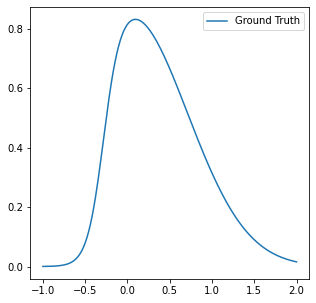

In [7]:
X = np.linspace(-1, 2, 300)
plt.figure(figsize=(5, 5))
plt.plot(X, 1/G *np.exp(-nlp(X)), label = 'Ground Truth')
#plt.plot(X, norm.pdf(X, mu_Laplace, Sigma_Laplace), label = 'Laplace appr.')
plt.legend()
plt.show()

### (a) MCMC

In [8]:
def TK(z_given, tau):
    z_new = norm.rvs(loc = z_given, scale = tau)
    #acc =  (sigma_(z_new)*norm.pdf(z_given, loc = z_new, scale = tau))
    #acc = acc/(sigma_(z_given)*norm.pdf(z_new, loc = z_given, scale = tau))
    #acc = min(1, acc)
    
    log_acc = -nlp(z_new) + nlp(z_given) + norm.logpdf(z_given, loc = z_new, scale = tau) - norm.logpdf(z_new, loc = z_given, scale = tau)
    log_p = np.log(np.random.uniform())
    if log_p <= log_acc:
        return z_new
    else:
        return None

In [9]:
def _rvs_(tau = 0.01, n_sample = 50000, burn_in_after = 10**5, pick_every = 10):
    c = 1
    sampled = 0
    z_given = 0
    Sample_points = []
    iteration = 0
    while sampled < n_sample:
        if iteration % 10000 == 0:
            print('iteration {}'.format(iteration))
        iteration += 1
        z_ = TK(z_given = z_given, tau = tau)
        if z_ is not None:
            c += 1
            z_given = z_
            if c == burn_in_after:
                print('burn_in!!')
            if c >= burn_in_after:
                if sampled % pick_every == 0:
                    Sample_points.append(z_given)
                sampled += 1
    return Sample_points, c/iteration

In [10]:
t = time.time()
S, p = _rvs_()
print(time.time()-t)

iteration 0
iteration 10000
iteration 20000
iteration 30000
iteration 40000
iteration 50000
iteration 60000
iteration 70000
iteration 80000
iteration 90000
iteration 100000
burn_in!!
iteration 110000
iteration 120000
iteration 130000
iteration 140000
iteration 150000
34.542393922805786


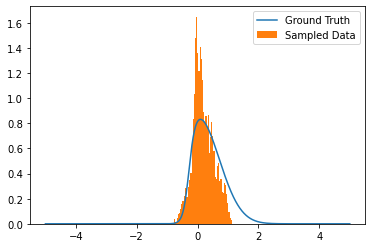

In [11]:
#plt.figure(figsize=(10,10))
x = np.linspace(-5, 5, 1000)
plt.plot(x, 1/G *np.exp(-nlp(x)), label = 'Ground Truth')
plt.hist(S, bins=50, density=True, label = "Sampled Data")
plt.legend()
plt.show()

iteration 0
iteration 10000
iteration 20000
iteration 30000
iteration 40000
iteration 50000
iteration 60000
iteration 70000
iteration 80000
iteration 90000
iteration 100000
burn_in!!
iteration 110000
iteration 120000
iteration 130000
iteration 140000
iteration 150000
Running time for tau = 0.01 is 34.68076491355896


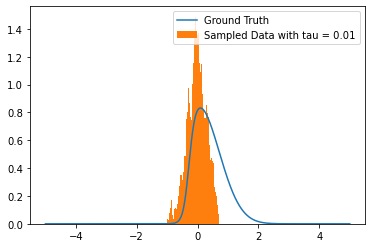

iteration 0
iteration 10000
iteration 20000
iteration 30000
iteration 40000
iteration 50000
iteration 60000
iteration 70000
iteration 80000
iteration 90000
iteration 100000
burn_in!!
iteration 110000
iteration 120000
iteration 130000
iteration 140000
iteration 150000
iteration 160000
Running time for tau = 0.1 is 36.86492204666138


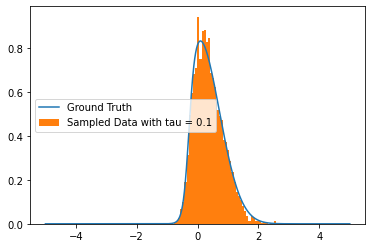

iteration 0
iteration 10000
iteration 20000
iteration 30000
iteration 40000
iteration 50000
iteration 60000
iteration 70000
iteration 80000
iteration 90000
iteration 100000
iteration 110000
burn_in!!
iteration 120000
iteration 130000
iteration 140000
iteration 150000
iteration 160000
iteration 170000
Running time for tau = 0.2 is 39.692442893981934


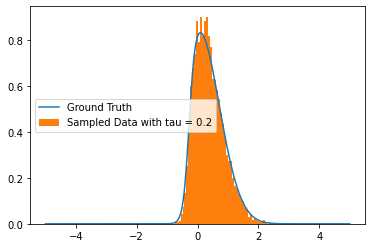

iteration 0
iteration 10000
iteration 20000
iteration 30000
iteration 40000
iteration 50000
iteration 60000
iteration 70000
iteration 80000
iteration 90000
iteration 100000
iteration 110000
iteration 120000
iteration 130000
iteration 140000
burn_in!!
iteration 150000
iteration 160000
iteration 170000
iteration 180000
iteration 190000
iteration 200000
iteration 210000
Running time for tau = 0.5 is 50.89584827423096


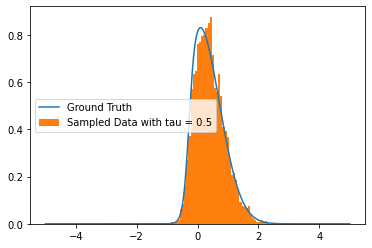

iteration 0
iteration 10000
iteration 20000
iteration 30000
iteration 40000
iteration 50000
iteration 60000
iteration 70000
iteration 80000
iteration 90000
iteration 100000
iteration 110000
iteration 120000
iteration 130000
iteration 140000
iteration 150000
iteration 160000
iteration 170000
iteration 180000
iteration 190000
iteration 200000
burn_in!!
iteration 210000
iteration 220000
iteration 230000
iteration 240000
iteration 250000
iteration 260000
iteration 270000
iteration 280000
iteration 290000
iteration 300000
iteration 310000
Running time for tau = 1 is 70.50071001052856


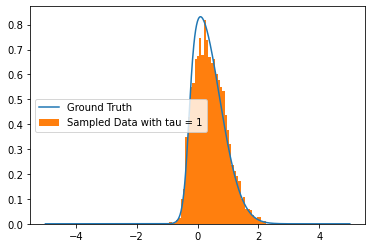

In [12]:
rate = []
x = np.linspace(-5, 5, 1000)
y = 1/G *np.exp(-nlp(x))
for tau in [0.01, 0.1, 0.2, 0.5, 1]:
    t = time.time()
    S, p = _rvs_(tau = tau)
    print('Running time for tau = {} is {}'.format(tau,time.time()-t))
    rate.append(p)
    plt.plot(x, y, label = 'Ground Truth')
    plt.hist(S, bins=50, density=True, label = "Sampled with tau = {}".format(tau))
    plt.title('Metroplis-Hasting sampling with tau = {}'.format(tau))
    plt.legend()
    plt.show()

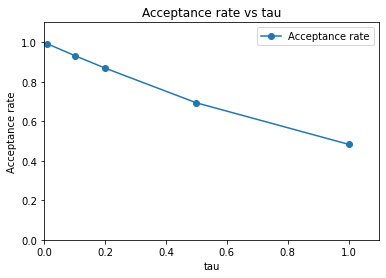

In [13]:
plt.plot([0.01, 0.1, 0.2, 0.5, 1], rate, label = 'Acceptance rate', marker = 'o')
plt.xlabel("tau")
plt.ylabel("Acceptance rate")
plt.title('Acceptance rate vs tau')
plt.xlim((0.0, 1.10))
plt.ylim((0.0, 1.10))
plt.legend()
plt.show()

### (b) HMC

In [14]:
d = 1
mu = np.zeros(d)

In [15]:
M = np.eye(d)

In [16]:
K_ = lambda r, M: 0.5 * r.reshape(1, -1) @ np.linalg.inv(M) @ r.reshape(-1, 1)

In [17]:
K = lambda r: K_ (r, M)

In [18]:
U = lambda z : nlp(z)

In [19]:
dU = lambda z : 2*alpha*z - a *(1-sigma(z))

In [20]:
H = lambda z, r : U(z) + K(r)

In [21]:
def Leapfrog(eps, z, r, dU = dU):
    r_half = r - eps * dU(z)/2
    z_new = z + eps * np.linalg.inv(M) @ r_half
    r_new = r_half - eps * dU(z_new)/2
    return z_new, r_new

In [22]:
def L_step_Leapfrog(z, r, eps, L = 10):
    r_ = r.copy()
    z_ = z.copy()
    for l in range(L):
        z_, r_ = Leapfrog(eps = eps, z = z_, r = r_)
    return z_ , r_

In [23]:
def HMC(z_0, r_pdf = Gaussian(mu, M), L = 10, eps = 0.01, 
        n_sample = 50000, burn_in_after = 10**5, pick_every = 10):
    
    Sample_points = []
    iteration = 0
    c = 0
    sampled = 0
    z_new = z_0.copy()
    
    while sampled <= n_sample:
        iteration += 1
        r_0 = r_pdf.rvs()
        z_new, r_new = L_step_Leapfrog(eps = eps, z = z_0, r = r_0)
        
        p = np.log(np.random.uniform())
        if p <= H(z_0, r_0) - H(z_new, -r_new):
            c += 1
            if Iteration % 10000 == 0:
                print('Iteration = {}, number of accepted points = {}'.format(iteration , c) )
                print(c/iteration)
            if c == burn_in_after:
                print('burn in')
            if c >= burn_in_after:
                if sampled % 10 == 0:
                    Sample_points.append(z_new)
                    z_0 = z_new.copy()
                sampled += 1
            else:
                z_0 = z_new.copy()
                    
    return np.array(Sample_points), c/iteration

In [24]:
eps_list = [0.005,0.01,0.1,0.2,0.5]

In [25]:
S, p = HMC(z_0 = np.zeros(1))

Iteration = 10000, number of accepted points = 10000
1.0
Iteration = 20000, number of accepted points = 20000
1.0
Iteration = 30000, number of accepted points = 30000
1.0
Iteration = 40000, number of accepted points = 40000
1.0
Iteration = 50000, number of accepted points = 50000
1.0
Iteration = 60000, number of accepted points = 60000
1.0
Iteration = 70000, number of accepted points = 70000
1.0
Iteration = 80000, number of accepted points = 80000
1.0
Iteration = 90000, number of accepted points = 90000
1.0
Iteration = 100000, number of accepted points = 100000
1.0
burn in
Iteration = 110000, number of accepted points = 110000
1.0
Iteration = 120000, number of accepted points = 120000
1.0
Iteration = 130000, number of accepted points = 130000
1.0
Iteration = 140000, number of accepted points = 140000
1.0
Iteration = 150000, number of accepted points = 150000
1.0


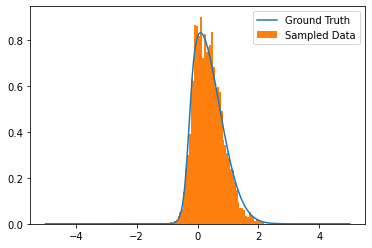

In [26]:
#plt.figure(figsize=(10,10))
x = np.linspace(-5, 5, 1000)
plt.plot(x, 1/G *np.exp(-nlp(x)), label = 'Ground Truth')
plt.hist(S, bins=50, density=True, label = "Sampled")
plt.legend()
plt.show()

Iteration = 10000, number of accepted points = 10000
1.0
Iteration = 20000, number of accepted points = 20000
1.0
Iteration = 30000, number of accepted points = 30000
1.0
Iteration = 40000, number of accepted points = 40000
1.0
Iteration = 50000, number of accepted points = 50000
1.0
Iteration = 60000, number of accepted points = 60000
1.0
Iteration = 70000, number of accepted points = 70000
1.0
Iteration = 80000, number of accepted points = 80000
1.0
Iteration = 90000, number of accepted points = 90000
1.0
Iteration = 100000, number of accepted points = 100000
1.0
burn in
Iteration = 110000, number of accepted points = 110000
1.0
Iteration = 120000, number of accepted points = 120000
1.0
Iteration = 130000, number of accepted points = 130000
1.0
Iteration = 140000, number of accepted points = 140000
1.0
Iteration = 150001, number of accepted points = 150000
0.9999933333777775
Running time for eps = 0.005 is 197.24416494369507


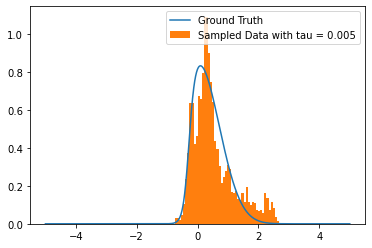

Iteration = 10002, number of accepted points = 10000
0.9998000399920016
Iteration = 20002, number of accepted points = 20000
0.9999000099990001
Iteration = 30002, number of accepted points = 30000
0.9999333377774815
Iteration = 40002, number of accepted points = 40000
0.999950002499875
Iteration = 50002, number of accepted points = 50000
0.999960001599936
Iteration = 60002, number of accepted points = 60000
0.9999666677777408
Iteration = 70002, number of accepted points = 70000
0.9999714293877318
Iteration = 80002, number of accepted points = 80000
0.9999750006249843
Iteration = 90002, number of accepted points = 90000
0.999977778271594
Iteration = 100002, number of accepted points = 100000
0.999980000399992
burn in
Iteration = 110002, number of accepted points = 110000
0.9999818185123907
Iteration = 120002, number of accepted points = 120000
0.9999833336111065
Iteration = 130003, number of accepted points = 130000
0.9999769236094551
Iteration = 140003, number of accepted points = 1400

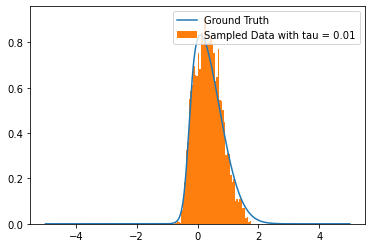

Iteration = 10044, number of accepted points = 10000
0.9956192751891677
Iteration = 20083, number of accepted points = 20000
0.9958671513220136
Iteration = 30129, number of accepted points = 30000
0.9957184108334163
Iteration = 40181, number of accepted points = 40000
0.9954953833901595
Iteration = 50220, number of accepted points = 50000
0.9956192751891677
Iteration = 60271, number of accepted points = 60000
0.9955036418841565
Iteration = 70319, number of accepted points = 70000
0.9954635304825153
Iteration = 80352, number of accepted points = 80000
0.9956192751891677
Iteration = 90396, number of accepted points = 90000
0.9956192751891677
Iteration = 100443, number of accepted points = 100000
0.9955895383451311
burn in
Iteration = 110494, number of accepted points = 110000
0.9955291690046518
Iteration = 120534, number of accepted points = 120000
0.9955697147692767
Iteration = 130580, number of accepted points = 130000
0.9955582784499923
Iteration = 140620, number of accepted points = 

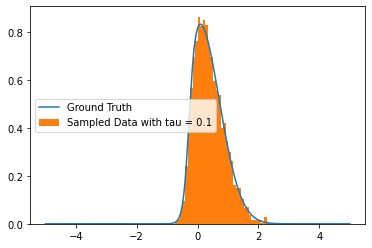

Iteration = 10249, number of accepted points = 10000
0.9757049468240804
Iteration = 20539, number of accepted points = 20000
0.9737572423194898
Iteration = 30805, number of accepted points = 30000
0.9738678785911378
Iteration = 41108, number of accepted points = 40000
0.9730466089325679
Iteration = 51409, number of accepted points = 50000
0.9725923476434087
Iteration = 61685, number of accepted points = 60000
0.9726837967090864
Iteration = 71980, number of accepted points = 70000
0.972492358988608
Iteration = 82238, number of accepted points = 80000
0.9727863031688514
Iteration = 92527, number of accepted points = 90000
0.9726890529250921
Iteration = 102810, number of accepted points = 100000
0.9726680284019065
burn in
Iteration = 113084, number of accepted points = 110000
0.9727282374164338
Iteration = 123350, number of accepted points = 120000
0.9728415079043372
Iteration = 133597, number of accepted points = 130000
0.9730757427187736
Iteration = 143861, number of accepted points = 1

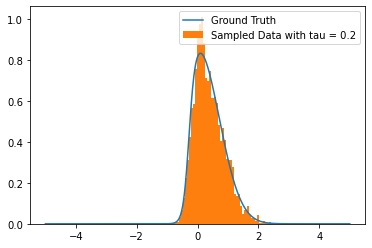

Iteration = 15977, number of accepted points = 10000
0.6258997308631157
Iteration = 31915, number of accepted points = 20000
0.6266645777847407
Iteration = 47958, number of accepted points = 30000
0.6255473539346929
Iteration = 64084, number of accepted points = 40000
0.6241807627488921
Iteration = 79933, number of accepted points = 50000
0.6255238762463563
Iteration = 95920, number of accepted points = 60000
0.6255212677231026
Iteration = 111673, number of accepted points = 70000
0.6268301200827415
Iteration = 127785, number of accepted points = 80000
0.626051570998161
Iteration = 143673, number of accepted points = 90000
0.6264225010962394
Iteration = 159689, number of accepted points = 100000
0.626217209701357
burn in
Iteration = 175585, number of accepted points = 110000
0.6264772047726173
Iteration = 191502, number of accepted points = 120000
0.6266253093962465
Iteration = 207397, number of accepted points = 130000
0.626817167075705
Iteration = 223358, number of accepted points = 

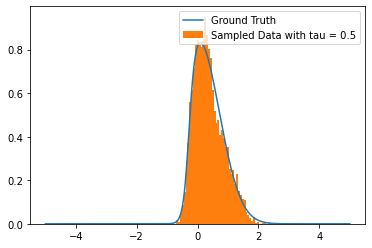

In [27]:
rate = []
x = np.linspace(-5, 5, 1000)
y = 1/G *np.exp(-nlp(x))
for eps in eps_list:
    t = time.time()
    S, p = HMC(z_0 = np.zeros(1), eps = eps)
    print('Running time for eps = {} is {}'.format(eps,time.time()-t))
    rate.append(p)
    plt.plot(x, y, label = 'Ground Truth')
    plt.hist(S, bins=50, density=True, label = "Sampled with eps = {}".format(eps))
    plt.title('Hybrid Monte-Carlo sampling with eps = {}'.format(eps))
    plt.legend()
    plt.show()

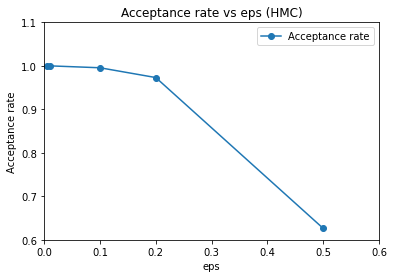

In [34]:
plt.plot(eps_list, rate, label = 'Acceptance rate', marker = 'o')
plt.xlabel("eps")
plt.ylabel("Acceptance rate")
plt.title('Acceptance rate vs eps (HMC)')
plt.xlim((0.0, 0.6))
plt.ylim((0.6, 1.1))
plt.legend()
plt.show()